# Reconocimiento de señaleticas viales utilizando redes neuronales convolucionales.

##                                                             RESUMEN

## Actualmente en Chile ocurren más de 90.000 accidentes de tránsito al año, de los cuales más de 6.500 corresponden a desobedecer las señaléticas “Ceda el paso” y “Pare”, mientras que más de 700 corresponden a condiciones físicas deficientes por parte del conductor (cansancio, sueño, fatiga). Teniendo esta problemática en mente, el propósito de esta investigación y desarrollo es realizar un software prototipo que implemente técnicas de aprendizaje profundo, precisamente con redes neuronales convolucionales, cuyo objetivo es informar y asistir al conductor de las futuras aproximaciones de dichas señaléticas mediante una alerta, logrando que éste esté al tanto aún en condiciones deficientes, colaborando en la disminución de los accidentes ocasionados por la desprevención de los conductores. 

In [112]:
#* Librerias
import os                   #Se importan funcionalidades del sistema operativo
import tensorflow as tf     #Librería TensorFlow (GPU: ON)
import numpy as np          #Librería para manejo de matrices
import cv2                  #Importar imagenes, reajustarla, etc.
import random               
from tqdm import tqdm       #Librería 100%|██████████████████████████████████████████████████████████████████████████████████| 
import matplotlib.pyplot as plt

'''Librerias para entrenar la red'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import losses
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
import keras
from keras import regularizers
from keras.layers import Convolution2D, GlobalAveragePooling1D, MaxPooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras import metrics
from keras.layers import Dense
from keras.models import load_model

In [113]:
class dataset():
    
    set_train = []
    set_test = []
    
    def __init__(self, path_train, path_test, ancho, alto, canales=1):
        self.path_train = path_train
        self.path_test = path_test
        self.ancho = ancho
        self.alto = alto
        self.canales = 1 #Por defecto lo definire como 1
        
    #En el caso de no tener el dataset formateado
    def formateado(self):
        '''
        Funcion que formatea los nombres para que sean
        homogeneos.
        '''
        for i,name in tqdm(enumerate(os.listdir(self.path_train))):
            nombre = str(i) + "." + img.split('.')[1] + ".jpg"
            os.rename(img, str(nombre))
            
    def img_label(self,name):
        '''
        Funcion que retorna un label dependiendo del nombre de la imagen,
        ya que se esta realizando un entrenamiento supervisado.
        '''
        if name == "DISCO-PARE":
            return [1,0,0]
        elif name == "CEDA-EL-PASO":
            return [0,1,0]
        else:
            return [0,0,1]
    
    def data_train(self):
        for i in tqdm(os.listdir(self.path_train)):
            label_img = self.img_label(i.split("_")[0])
            full_path = os.path.join(self.path_train, i)
            img_gray = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            #Obtendremos la imagen en formato BGR
            #img_bgr = cv2.imread(full_path)
            #b,g,r = cv2.split(img_bgr) #Separamos los canales de colores
            #Tenemos una imagen en formato RGB
            #img_rgb = cv2.merge([r,g,b])
            img = cv2.resize(img_gray, (400,400))
            self.set_train.append([np.array(img), label_img])
        random.shuffle(self.set_train)
        #return self.set_train
    
    def data_test(self):
        for i in tqdm(os.listdir(self.path_test)):
            label_img = self.img_label(i.split("_")[0])
            full_path = os.path.join(self.path_test, i)
            img_gray = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            #Obtendremos la imagen en formato BGR
            #img_bgr = cv2.imread(full_path)
            #b,g,r = cv2.split(img_bgr) #Separamos los canales de colores
            #Tenemos una imagen en formato RGB
            #img_rgb = cv2.merge([r,g,b])
            img = cv2.resize(img_gray, (400,400))
            self.set_test.append([np.array(img), label_img])
        random.shuffle(self.set_test)
        #return self.set_test
        
    def data_format(self):
        '''
        Se formatea la lectura de los datos:
        X -> Archivos de entrenamiento (en este caso son imagenes)
        Y -> Las etiquetas (labels) de los datos
        -----------------------------------------------------------
        X_test -> Archivos de prueba
        Y_test -> Labels de los archivos
        '''
        X = np.array([i[0] for i in self.set_train]).reshape(-1,self.ancho,self.alto,self.canales) 
        Y = np.array([i[1] for i in self.set_train])
        
        X_test = np.array([i[0] for i in self.set_test]).reshape(-1,self.ancho,self.alto,self.canales) 
        Y_test = np.array([i[1] for i in self.set_test])
        
        return X, Y, X_test, Y_test
    
    def main(self):
        print("Datos de entrenamiento")
        self.data_train()
        print("Datos de prueba")
        self.data_test()
        print("Formateo de datos")
        return self.data_format()

| Capa (Tipo) | Salida  |
|------|------|
| input_5 (InputLayer)     |    (None, 400, 400, 1)|
| Entrada (Conv2D)     |    (None, 398, 398, 10)|
| max_pooling2d_25 (MaxPooling)     |    (None, 199, 199, 10)|
| conv2d_21 (Conv2D)     |    (None, 198, 198, 20)|
| max_pooling2d_26 (MaxPooling)     |    (None, 99, 99, 20)|
| conv2d_22 (Conv2D)     |    (None, 97, 97, 30)|
| max_pooling2d_27 (MaxPooling)     |    (None, 48, 48, 30) |
| conv2d_23 (Conv2D)     |    (None, 46, 46, 40)|
| max_pooling2d_28 (MaxPooling)     |    (None, 23, 23, 40)|
| conv2d_24 (Conv2D)     |    (None, 22, 22, 50)|
| max_pooling2d_29 (MaxPooling)     |    (None, 11, 11, 50)|
| conv2d_25 (Conv2D)     |    (None, 9, 9, 60)|
| max_pooling2d_30 (MaxPooling)     |    (None, 9, 9, 60)|
| flatten_5 (Flatten)     |    (None, 4860) |
| dense_9 (Dense)      |    (None, 1024) |
| dense_10 (Dense)     |    (None, 512) |
| dropout_10 (Dropout)     |    (None, 512) |
| dense_11 (Dense)       |    (None, 256) |
| dropout_11 (Dropout)   |      (None, 256) |
| salida (Dense)         |      (None, 3) |

In [132]:
class CNN:
    
    history = ""
    model = ""
    
    def __init__(self, X, Y, X_test, Y_test, Ancho, Alto, Canales, epochs, lr):
        self.data_X = np.array(X)
        self.data_Y = np.array(Y)
        self.test_X = np.array(X_test)
        self.test_Y = np.array(Y_test)
        self.channels = Canales
        self.ancho = Ancho
        self.alto = Alto
        self.epoch = epochs
        self.lr = lr
    
    def model(self):
        x_input = Input((self.ancho,self.alto,self.channels))
        Entrada = Convolution2D(10,(3,3), activation='relu', data_format="channels_last", name='Entrada')(x_input)#11
        x = BatchNormalization()(Entrada)
        x = MaxPooling2D(pool_size=(2, 2))(Entrada)

        x = Convolution2D(20,(2, 2), activation='relu')(x)#9
        #x = Convolution2D(25,(5, 5), activation='relu')(x)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        #x = Dropout(0.1)(x)

        x = Convolution2D(30,(3, 3), activation='relu')(x)#9
        #x = Convolution2D(25,(5, 5), activation='relu')(x)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        #x = Dropout(0.3)(x)

        #x = Convolution2D(30,(3, 3), activation='relu')(x)#9
        x = Convolution2D(40,(3, 3), activation='relu')(x)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        #x = Dropout(0.1)(x)

        #x = Convolution2D(40,(5, 5), activation='relu')(x)#2
        x = Convolution2D(50,(2, 2), activation='relu')(x)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        #x = Dropout(0.3)(x)

        x = Convolution2D(60,(3 ,3), activation='relu')(x)#2
        #x = Convolution2D(55,(4 ,4), activation='relu')(x)
        #x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(1, 1))(x)
        #x = Dropout(0.1)(x)
        x = Flatten()(x)

        #softmax
        #y = Flatten()(x)
        y = Dense(1024, activation='relu')(x)
        y = Dropout(0.6)(y)

        y = Dense(512, activation='relu')(y)
        y = Dropout(0.5)(y)

        y = Dense(256, activation='relu')(y)
        y = Dropout(0.2)(y)

        y = Dense(3, activation='softmax', name='salida')(y)
        
        self.model = Model(x_input, y)
        
        return Model(x_input, y)
    
    def plots(self):
        '''
        Graficos del ultimo entrenamiento realizado.
        1-> Precision del modelo en base a las epochs
        2-> Perdida del modelo en funcion de las epochs
        '''
        plt.plot(self.history.history['acc'])
        plt.plot(self.history.history['val_acc'])
        plt.title('Precisión del modelo')
        plt.ylabel('Precisión')
        plt.xlabel('Épocas')
        plt.legend(['Entrenamiento', 'Pruebas'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Pérdida del modelo')
        plt.ylabel('Pérdida')
        plt.xlabel('Épocas')
        plt.legend(['Entrenamiento', 'Pruebas'], loc='upper left')
        plt.show()
        
    def save(self):
        self.model.save('output_model.model')
        
    def load(self):
        self.model = load_model('output_model.model')
     
    def modelo(self):
        return self.model
    
    def train(self):
        model = self.model()
        adam = Adam(lr=self.lr)
        model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[metrics.categorical_accuracy, 'acc'])
        self.history = model.fit(self.data_X, self.data_Y, epochs=self.epoch, validation_data=(self.test_X, self.test_Y), shuffle=True)
        print("El modelo se ha entrenado correctamente")
        self.plots()
        self.save()
        self.modelo()


In [135]:
class BB1(CNN):
    
    img = None
    bb_c = None
    
    def __init__(self, path_imagen, modelo, ancho, alto, canales=1):
        self.ancho = ancho
        self.alto = alto
        self.canales = canales
        self.path = path_imagen
        self.modelo = modelo
    
    def imagen(self):
        imagen_prueba = cv2.imread(self.path)
        img = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2YCR_CB)
        y,cr,cb = cv2.split(img)   
        imagen_prueba = cv2.resize(cr, (self.ancho,self.alto))
        self.img = np.array(imagen_prueba)
    
    def prediccion(self, imagen):
        img = cv2.resize(imagen, (self.ancho,self.alto))
        img = img.reshape(-1,self.ancho,self.alto,self.canales)
        #print(np.argmax(model.predict(img)))
        #print(model.predict(img))
        prob = self.modelo.predict(img)
        argumento = np.argmax(self.modelo.predict(img))
        return argumento
    
    def plots(self):
        imagen_prueba = cv2.imread(self.path)
        img = cv2.resize(imagen_prueba, (self.ancho,self.ancho),3)
        b,g,r = cv2.split(img)       # get b,g,r
        img = cv2.merge([r,g,b])     # switch it to rgb
        orden = []
        #for i in range(int(len(test))):
        #    valor1=test[i][0][0]
        #    valor2=test[i][0][1]
        #    valor3=test[i][0][2]
        #    valor4=test[i][0][3]
        #    #cv2.rectangle(img,(valor4,valor3),(valor2,valor1),(0,255,0),1)

        img = cv2.rectangle(img,(int(self.bb_c[3]),int(self.bb_c[2])),(int(self.bb_c[1]),int(self.bb_c[0])),(255,0,0),2)
        #img = cv2.rectangle(img,(int(bb_d[3]),int(bb_d[2])),(int(bb_d[1]),int(bb_d[0])),(0,255,0),4)
        #recortado = np.array(imagen_prueba[int(bb_d[0]) : int(bb_d[2]), int(bb_d[1]) : int(bb_d[3])])
        plt.axis('off')
        plt.imshow(img, cmap="gray")
    
    def boundingBox(self):
        mejores = []
        bb_c = None
        bb_d = None
        bb_f = None
        bb = None
        best_bb_c = None
        best_bb_d = None
        best_bb_prob_c = 0
        best_bb_prob_d = 0
        V = [50,100,200]
        imagen_bb = np.zeros(self.img.shape, dtype=int)
        imagen_bb2 = []
        #print(imagen_bb.shape)
        for v in V:
            #print(v)
            valor = self.ancho - v
            for i in range(0, self.ancho , v):
                for j in range(0,self.alto,v):
                    recortado = self.img[i : i+v, j : j+v]
                    prediccion = self.prediccion(recortado)
                    if prediccion == 0:
                        bb_d = [i, j, i+v, j+v, prediccion]
                        mejores.append([bb_d, prob])
                    elif prediccion == 1:
                        bb_c = [i, j, i+v, j+v, prediccion]
                    else:
                        bb_f = [i, j, i+v, j+v, prediccion] 
                        prob = 0
                    if prob >= best_bb_prob_d and prediccion == 0:
                        if best_bb_d is not None:
                            best_bb_d[0] = min(best_bb_d[0], bb_d[0])
                            best_bb_d[1] = min(best_bb_d[1], bb_d[1])
                            best_bb_d[2] = max(best_bb_d[2], bb_d[2])
                            best_bb_d[3] = max(best_bb_d[3], bb_d[3])
                        else:
                            best_bb_d = bb_d 
                        best_bb_prob_d = prob 

                    if prob >= best_bb_prob_c and prediccion == 1:
                        if best_bb_c is not None:
                            best_bb_c[0] = min(best_bb_c[0], bb_c[0])
                            best_bb_c[1] = min(best_bb_c[1], bb_c[1])
                            best_bb_c[2] = max(best_bb_c[2], bb_c[2])
                            best_bb_c[3] = max(best_bb_c[3], bb_c[3])
                        else:
                            best_bb_c = bb_c 
                        best_bb_prob_c = prob
                #funcion
        #print(len(mejores))
        #print('El mejor Bounding Box es: %r' % (best_bb_d, ))
        #print('El mejor Bounding Box es: %r' % (best_bb_c, ))
        self.bb_c = best_bb_c
        #return best_bb_c, best_bb_d, mejores, imagen_bb
    
    def main(self):
        self.imagen()
        self.boundingBox()
        self.plots()

In [139]:
path_train = "D:/kaggle/disco pare/cr_principal"
path_test = "D:/kaggle/disco pare/validacion_cr"
data = dataset(path_train,path_test,400,400)
X, Y, X_test, Y_test = data.main()

Datos de entrenamiento


100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [00:10<00:00, 42.50it/s]


Datos de prueba


100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:04<00:00, 28.67it/s]


Formateo de datos


Train on 450 samples, validate on 120 samples
Epoch 1/100
450/450 [==============================] - ETA: 24s - loss: 9.8160 - categorical_accuracy: 0.3125 - acc: 0.312 - ETA: 11s - loss: 8.3439 - categorical_accuracy: 0.3438 - acc: 0.343 - ETA: 7s - loss: 8.5642 - categorical_accuracy: 0.3229 - acc: 0.322 - ETA: 5s - loss: 8.5771 - categorical_accuracy: 0.3281 - acc: 0.32 - ETA: 4s - loss: 8.9452 - categorical_accuracy: 0.3125 - acc: 0.31 - ETA: 3s - loss: 9.1470 - categorical_accuracy: 0.2917 - acc: 0.29 - ETA: 2s - loss: 9.0827 - categorical_accuracy: 0.2991 - acc: 0.29 - ETA: 1s - loss: 8.9441 - categorical_accuracy: 0.3008 - acc: 0.30 - ETA: 1s - loss: 8.8767 - categorical_accuracy: 0.3125 - acc: 0.31 - ETA: 1s - loss: 8.5862 - categorical_accuracy: 0.3250 - acc: 0.32 - ETA: 0s - loss: 8.6483 - categorical_accuracy: 0.3267 - acc: 0.32 - ETA: 0s - loss: 8.5376 - categorical_accuracy: 0.3333 - acc: 0.33 - ETA: 0s - loss: 8.4777 - categorical_accuracy: 0.3438 - acc: 0.34 - ETA: 0s - 

450/450 [==============================] - ETA: 1s - loss: 5.3184 - categorical_accuracy: 0.4062 - acc: 0.40 - ETA: 1s - loss: 4.6089 - categorical_accuracy: 0.4844 - acc: 0.48 - ETA: 1s - loss: 5.8317 - categorical_accuracy: 0.4375 - acc: 0.43 - ETA: 1s - loss: 5.8899 - categorical_accuracy: 0.4219 - acc: 0.42 - ETA: 0s - loss: 6.2274 - categorical_accuracy: 0.4062 - acc: 0.40 - ETA: 0s - loss: 6.5223 - categorical_accuracy: 0.3594 - acc: 0.35 - ETA: 0s - loss: 6.4962 - categorical_accuracy: 0.3750 - acc: 0.37 - ETA: 0s - loss: 6.5360 - categorical_accuracy: 0.3789 - acc: 0.37 - ETA: 0s - loss: 6.6301 - categorical_accuracy: 0.3715 - acc: 0.37 - ETA: 0s - loss: 6.7013 - categorical_accuracy: 0.3656 - acc: 0.36 - ETA: 0s - loss: 6.5617 - categorical_accuracy: 0.3778 - acc: 0.37 - ETA: 0s - loss: 6.7366 - categorical_accuracy: 0.3646 - acc: 0.36 - ETA: 0s - loss: 6.7175 - categorical_accuracy: 0.3606 - acc: 0.36 - ETA: 0s - loss: 6.7401 - categorical_accuracy: 0.3571 - acc: 0.35 - 2s 4m

450/450 [==============================] - ETA: 1s - loss: 3.8398 - categorical_accuracy: 0.3438 - acc: 0.34 - ETA: 1s - loss: 3.8261 - categorical_accuracy: 0.3125 - acc: 0.31 - ETA: 1s - loss: 3.8002 - categorical_accuracy: 0.3229 - acc: 0.32 - ETA: 0s - loss: 4.3093 - categorical_accuracy: 0.3047 - acc: 0.30 - ETA: 0s - loss: 4.2860 - categorical_accuracy: 0.3125 - acc: 0.31 - ETA: 0s - loss: 4.0732 - categorical_accuracy: 0.3438 - acc: 0.34 - ETA: 0s - loss: 4.1992 - categorical_accuracy: 0.3304 - acc: 0.33 - ETA: 0s - loss: 4.0661 - categorical_accuracy: 0.3438 - acc: 0.34 - ETA: 0s - loss: 4.0013 - categorical_accuracy: 0.3646 - acc: 0.36 - ETA: 0s - loss: 3.8427 - categorical_accuracy: 0.3750 - acc: 0.37 - ETA: 0s - loss: 3.9124 - categorical_accuracy: 0.3722 - acc: 0.37 - ETA: 0s - loss: 3.8985 - categorical_accuracy: 0.3646 - acc: 0.36 - ETA: 0s - loss: 3.9091 - categorical_accuracy: 0.3486 - acc: 0.34 - ETA: 0s - loss: 3.8619 - categorical_accuracy: 0.3571 - acc: 0.35 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 2.8679 - categorical_accuracy: 0.2500 - acc: 0.25 - ETA: 1s - loss: 2.6125 - categorical_accuracy: 0.2812 - acc: 0.28 - ETA: 1s - loss: 2.3878 - categorical_accuracy: 0.3438 - acc: 0.34 - ETA: 1s - loss: 2.2436 - categorical_accuracy: 0.3750 - acc: 0.37 - ETA: 0s - loss: 2.2352 - categorical_accuracy: 0.3688 - acc: 0.36 - ETA: 0s - loss: 2.2635 - categorical_accuracy: 0.3802 - acc: 0.38 - ETA: 0s - loss: 2.1951 - categorical_accuracy: 0.3929 - acc: 0.39 - ETA: 0s - loss: 2.1472 - categorical_accuracy: 0.3750 - acc: 0.37 - ETA: 0s - loss: 2.1563 - categorical_accuracy: 0.3681 - acc: 0.36 - ETA: 0s - loss: 2.0920 - categorical_accuracy: 0.3781 - acc: 0.37 - ETA: 0s - loss: 2.0111 - categorical_accuracy: 0.3835 - acc: 0.38 - ETA: 0s - loss: 1.9755 - categorical_accuracy: 0.3932 - acc: 0.39 - ETA: 0s - loss: 1.9899 - categorical_accuracy: 0.3894 - acc: 0.38 - ETA: 0s - loss: 1.9986 - categorical_accuracy: 0.3929 - acc: 0.39 - 2s 4m

450/450 [==============================] - ETA: 1s - loss: 1.2273 - categorical_accuracy: 0.4688 - acc: 0.46 - ETA: 1s - loss: 1.1960 - categorical_accuracy: 0.4844 - acc: 0.48 - ETA: 1s - loss: 1.1266 - categorical_accuracy: 0.5000 - acc: 0.50 - ETA: 0s - loss: 1.1846 - categorical_accuracy: 0.4531 - acc: 0.45 - ETA: 0s - loss: 1.1419 - categorical_accuracy: 0.4688 - acc: 0.46 - ETA: 0s - loss: 1.1611 - categorical_accuracy: 0.4792 - acc: 0.47 - ETA: 0s - loss: 1.1830 - categorical_accuracy: 0.4866 - acc: 0.48 - ETA: 0s - loss: 1.2430 - categorical_accuracy: 0.4648 - acc: 0.46 - ETA: 0s - loss: 1.2191 - categorical_accuracy: 0.4757 - acc: 0.47 - ETA: 0s - loss: 1.2324 - categorical_accuracy: 0.4688 - acc: 0.46 - ETA: 0s - loss: 1.2139 - categorical_accuracy: 0.4716 - acc: 0.47 - ETA: 0s - loss: 1.2339 - categorical_accuracy: 0.4688 - acc: 0.46 - ETA: 0s - loss: 1.2305 - categorical_accuracy: 0.4663 - acc: 0.46 - ETA: 0s - loss: 1.2590 - categorical_accuracy: 0.4621 - acc: 0.46 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 1.2238 - categorical_accuracy: 0.4688 - acc: 0.46 - ETA: 1s - loss: 1.2374 - categorical_accuracy: 0.4375 - acc: 0.43 - ETA: 1s - loss: 1.2550 - categorical_accuracy: 0.4167 - acc: 0.41 - ETA: 0s - loss: 1.1557 - categorical_accuracy: 0.4766 - acc: 0.47 - ETA: 0s - loss: 1.1645 - categorical_accuracy: 0.4938 - acc: 0.49 - ETA: 0s - loss: 1.1518 - categorical_accuracy: 0.4844 - acc: 0.48 - ETA: 0s - loss: 1.1614 - categorical_accuracy: 0.4866 - acc: 0.48 - ETA: 0s - loss: 1.1340 - categorical_accuracy: 0.4961 - acc: 0.49 - ETA: 0s - loss: 1.1370 - categorical_accuracy: 0.5000 - acc: 0.50 - ETA: 0s - loss: 1.1352 - categorical_accuracy: 0.4969 - acc: 0.49 - ETA: 0s - loss: 1.1282 - categorical_accuracy: 0.5000 - acc: 0.50 - ETA: 0s - loss: 1.1232 - categorical_accuracy: 0.4948 - acc: 0.49 - ETA: 0s - loss: 1.1226 - categorical_accuracy: 0.4880 - acc: 0.48 - ETA: 0s - loss: 1.1124 - categorical_accuracy: 0.4911 - acc: 0.49 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.8211 - categorical_accuracy: 0.6875 - acc: 0.68 - ETA: 1s - loss: 0.8790 - categorical_accuracy: 0.6406 - acc: 0.64 - ETA: 1s - loss: 0.8840 - categorical_accuracy: 0.6250 - acc: 0.62 - ETA: 0s - loss: 0.8571 - categorical_accuracy: 0.6328 - acc: 0.63 - ETA: 0s - loss: 0.9154 - categorical_accuracy: 0.5875 - acc: 0.58 - ETA: 0s - loss: 0.9183 - categorical_accuracy: 0.5833 - acc: 0.58 - ETA: 0s - loss: 0.9537 - categorical_accuracy: 0.5536 - acc: 0.55 - ETA: 0s - loss: 0.9253 - categorical_accuracy: 0.5703 - acc: 0.57 - ETA: 0s - loss: 0.9419 - categorical_accuracy: 0.5729 - acc: 0.57 - ETA: 0s - loss: 0.9478 - categorical_accuracy: 0.5781 - acc: 0.57 - ETA: 0s - loss: 0.9241 - categorical_accuracy: 0.5881 - acc: 0.58 - ETA: 0s - loss: 0.9211 - categorical_accuracy: 0.5911 - acc: 0.59 - ETA: 0s - loss: 0.9444 - categorical_accuracy: 0.5745 - acc: 0.57 - ETA: 0s - loss: 0.9507 - categorical_accuracy: 0.5670 - acc: 0.56 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.7791 - categorical_accuracy: 0.6562 - acc: 0.65 - ETA: 1s - loss: 0.8292 - categorical_accuracy: 0.6094 - acc: 0.60 - ETA: 1s - loss: 0.8417 - categorical_accuracy: 0.6250 - acc: 0.62 - ETA: 0s - loss: 0.8077 - categorical_accuracy: 0.6641 - acc: 0.66 - ETA: 0s - loss: 0.7635 - categorical_accuracy: 0.6813 - acc: 0.68 - ETA: 0s - loss: 0.7760 - categorical_accuracy: 0.6771 - acc: 0.67 - ETA: 0s - loss: 0.7739 - categorical_accuracy: 0.6696 - acc: 0.66 - ETA: 0s - loss: 0.7928 - categorical_accuracy: 0.6523 - acc: 0.65 - ETA: 0s - loss: 0.7786 - categorical_accuracy: 0.6597 - acc: 0.65 - ETA: 0s - loss: 0.7725 - categorical_accuracy: 0.6625 - acc: 0.66 - ETA: 0s - loss: 0.7757 - categorical_accuracy: 0.6591 - acc: 0.65 - ETA: 0s - loss: 0.7823 - categorical_accuracy: 0.6510 - acc: 0.65 - ETA: 0s - loss: 0.7773 - categorical_accuracy: 0.6587 - acc: 0.65 - ETA: 0s - loss: 0.7829 - categorical_accuracy: 0.6585 - acc: 0.65 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.6983 - categorical_accuracy: 0.6875 - acc: 0.68 - ETA: 1s - loss: 0.7449 - categorical_accuracy: 0.6562 - acc: 0.65 - ETA: 1s - loss: 0.6944 - categorical_accuracy: 0.7083 - acc: 0.70 - ETA: 0s - loss: 0.7568 - categorical_accuracy: 0.6641 - acc: 0.66 - ETA: 0s - loss: 0.7505 - categorical_accuracy: 0.6750 - acc: 0.67 - ETA: 0s - loss: 0.7585 - categorical_accuracy: 0.6667 - acc: 0.66 - ETA: 0s - loss: 0.7694 - categorical_accuracy: 0.6473 - acc: 0.64 - ETA: 0s - loss: 0.7971 - categorical_accuracy: 0.6406 - acc: 0.64 - ETA: 0s - loss: 0.7924 - categorical_accuracy: 0.6424 - acc: 0.64 - ETA: 0s - loss: 0.7861 - categorical_accuracy: 0.6375 - acc: 0.63 - ETA: 0s - loss: 0.7604 - categorical_accuracy: 0.6477 - acc: 0.64 - ETA: 0s - loss: 0.7708 - categorical_accuracy: 0.6380 - acc: 0.63 - ETA: 0s - loss: 0.7803 - categorical_accuracy: 0.6346 - acc: 0.63 - ETA: 0s - loss: 0.7733 - categorical_accuracy: 0.6339 - acc: 0.63 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.6186 - categorical_accuracy: 0.6875 - acc: 0.68 - ETA: 1s - loss: 0.5739 - categorical_accuracy: 0.7188 - acc: 0.71 - ETA: 1s - loss: 0.6441 - categorical_accuracy: 0.6771 - acc: 0.67 - ETA: 0s - loss: 0.6540 - categorical_accuracy: 0.6641 - acc: 0.66 - ETA: 0s - loss: 0.6513 - categorical_accuracy: 0.6937 - acc: 0.69 - ETA: 0s - loss: 0.6435 - categorical_accuracy: 0.7031 - acc: 0.70 - ETA: 0s - loss: 0.6420 - categorical_accuracy: 0.7143 - acc: 0.71 - ETA: 0s - loss: 0.6480 - categorical_accuracy: 0.7148 - acc: 0.71 - ETA: 0s - loss: 0.6578 - categorical_accuracy: 0.7083 - acc: 0.70 - ETA: 0s - loss: 0.6997 - categorical_accuracy: 0.7000 - acc: 0.70 - ETA: 0s - loss: 0.7065 - categorical_accuracy: 0.7045 - acc: 0.70 - ETA: 0s - loss: 0.7011 - categorical_accuracy: 0.7005 - acc: 0.70 - ETA: 0s - loss: 0.7038 - categorical_accuracy: 0.7067 - acc: 0.70 - ETA: 0s - loss: 0.6947 - categorical_accuracy: 0.7098 - acc: 0.70 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.4691 - categorical_accuracy: 0.7812 - acc: 0.78 - ETA: 1s - loss: 0.4991 - categorical_accuracy: 0.8125 - acc: 0.81 - ETA: 1s - loss: 0.6044 - categorical_accuracy: 0.7396 - acc: 0.73 - ETA: 0s - loss: 0.5559 - categorical_accuracy: 0.7812 - acc: 0.78 - ETA: 0s - loss: 0.5562 - categorical_accuracy: 0.7937 - acc: 0.79 - ETA: 0s - loss: 0.5353 - categorical_accuracy: 0.8021 - acc: 0.80 - ETA: 0s - loss: 0.5210 - categorical_accuracy: 0.8036 - acc: 0.80 - ETA: 0s - loss: 0.5126 - categorical_accuracy: 0.8008 - acc: 0.80 - ETA: 0s - loss: 0.5360 - categorical_accuracy: 0.7917 - acc: 0.79 - ETA: 0s - loss: 0.5347 - categorical_accuracy: 0.7875 - acc: 0.78 - ETA: 0s - loss: 0.5382 - categorical_accuracy: 0.7898 - acc: 0.78 - ETA: 0s - loss: 0.5417 - categorical_accuracy: 0.7917 - acc: 0.79 - ETA: 0s - loss: 0.5598 - categorical_accuracy: 0.7812 - acc: 0.78 - ETA: 0s - loss: 0.5606 - categorical_accuracy: 0.7790 - acc: 0.77 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.5951 - categorical_accuracy: 0.7188 - acc: 0.71 - ETA: 1s - loss: 0.6688 - categorical_accuracy: 0.6562 - acc: 0.65 - ETA: 1s - loss: 0.5644 - categorical_accuracy: 0.7292 - acc: 0.72 - ETA: 0s - loss: 0.5605 - categorical_accuracy: 0.7266 - acc: 0.72 - ETA: 0s - loss: 0.5496 - categorical_accuracy: 0.7438 - acc: 0.74 - ETA: 0s - loss: 0.5307 - categorical_accuracy: 0.7552 - acc: 0.75 - ETA: 0s - loss: 0.5398 - categorical_accuracy: 0.7634 - acc: 0.76 - ETA: 0s - loss: 0.5430 - categorical_accuracy: 0.7695 - acc: 0.76 - ETA: 0s - loss: 0.5590 - categorical_accuracy: 0.7674 - acc: 0.76 - ETA: 0s - loss: 0.5651 - categorical_accuracy: 0.7594 - acc: 0.75 - ETA: 0s - loss: 0.5670 - categorical_accuracy: 0.7557 - acc: 0.75 - ETA: 0s - loss: 0.5607 - categorical_accuracy: 0.7604 - acc: 0.76 - ETA: 0s - loss: 0.5604 - categorical_accuracy: 0.7548 - acc: 0.75 - ETA: 0s - loss: 0.5520 - categorical_accuracy: 0.7634 - acc: 0.76 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.5584 - categorical_accuracy: 0.8125 - acc: 0.81 - ETA: 1s - loss: 0.5638 - categorical_accuracy: 0.7812 - acc: 0.78 - ETA: 1s - loss: 0.5336 - categorical_accuracy: 0.7917 - acc: 0.79 - ETA: 0s - loss: 0.5276 - categorical_accuracy: 0.8047 - acc: 0.80 - ETA: 0s - loss: 0.5314 - categorical_accuracy: 0.8000 - acc: 0.80 - ETA: 0s - loss: 0.5099 - categorical_accuracy: 0.8021 - acc: 0.80 - ETA: 0s - loss: 0.4855 - categorical_accuracy: 0.8080 - acc: 0.80 - ETA: 0s - loss: 0.4701 - categorical_accuracy: 0.8164 - acc: 0.81 - ETA: 0s - loss: 0.4807 - categorical_accuracy: 0.8160 - acc: 0.81 - ETA: 0s - loss: 0.4820 - categorical_accuracy: 0.8094 - acc: 0.80 - ETA: 0s - loss: 0.4660 - categorical_accuracy: 0.8210 - acc: 0.82 - ETA: 0s - loss: 0.4622 - categorical_accuracy: 0.8255 - acc: 0.82 - ETA: 0s - loss: 0.4685 - categorical_accuracy: 0.8221 - acc: 0.82 - ETA: 0s - loss: 0.4609 - categorical_accuracy: 0.8259 - acc: 0.82 - 2s 4m

450/450 [==============================] - ETA: 1s - loss: 0.3896 - categorical_accuracy: 0.9375 - acc: 0.93 - ETA: 1s - loss: 0.4598 - categorical_accuracy: 0.8125 - acc: 0.81 - ETA: 1s - loss: 0.5008 - categorical_accuracy: 0.7812 - acc: 0.78 - ETA: 1s - loss: 0.4487 - categorical_accuracy: 0.8203 - acc: 0.82 - ETA: 0s - loss: 0.4984 - categorical_accuracy: 0.7937 - acc: 0.79 - ETA: 0s - loss: 0.4678 - categorical_accuracy: 0.8125 - acc: 0.81 - ETA: 0s - loss: 0.4821 - categorical_accuracy: 0.7902 - acc: 0.79 - ETA: 0s - loss: 0.4684 - categorical_accuracy: 0.8047 - acc: 0.80 - ETA: 0s - loss: 0.4528 - categorical_accuracy: 0.8125 - acc: 0.81 - ETA: 0s - loss: 0.4385 - categorical_accuracy: 0.8250 - acc: 0.82 - ETA: 0s - loss: 0.4609 - categorical_accuracy: 0.8267 - acc: 0.82 - ETA: 0s - loss: 0.4578 - categorical_accuracy: 0.8281 - acc: 0.82 - ETA: 0s - loss: 0.4626 - categorical_accuracy: 0.8269 - acc: 0.82 - ETA: 0s - loss: 0.4589 - categorical_accuracy: 0.8281 - acc: 0.82 - 2s 3m

450/450 [==============================] - ETA: 1s - loss: 0.6029 - categorical_accuracy: 0.8438 - acc: 0.84 - ETA: 1s - loss: 0.5323 - categorical_accuracy: 0.8438 - acc: 0.84 - ETA: 1s - loss: 0.4420 - categorical_accuracy: 0.8854 - acc: 0.88 - ETA: 0s - loss: 0.4124 - categorical_accuracy: 0.8984 - acc: 0.89 - ETA: 0s - loss: 0.4136 - categorical_accuracy: 0.8875 - acc: 0.88 - ETA: 0s - loss: 0.4388 - categorical_accuracy: 0.8802 - acc: 0.88 - ETA: 0s - loss: 0.4239 - categorical_accuracy: 0.8795 - acc: 0.87 - ETA: 0s - loss: 0.4201 - categorical_accuracy: 0.8789 - acc: 0.87 - ETA: 0s - loss: 0.4340 - categorical_accuracy: 0.8576 - acc: 0.85 - ETA: 0s - loss: 0.4186 - categorical_accuracy: 0.8656 - acc: 0.86 - ETA: 0s - loss: 0.4038 - categorical_accuracy: 0.8693 - acc: 0.86 - ETA: 0s - loss: 0.3928 - categorical_accuracy: 0.8750 - acc: 0.87 - ETA: 0s - loss: 0.4052 - categorical_accuracy: 0.8654 - acc: 0.86 - ETA: 0s - loss: 0.3943 - categorical_accuracy: 0.8683 - acc: 0.86 - 2s 3m

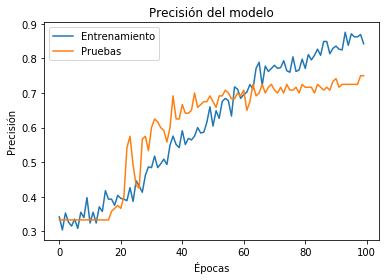

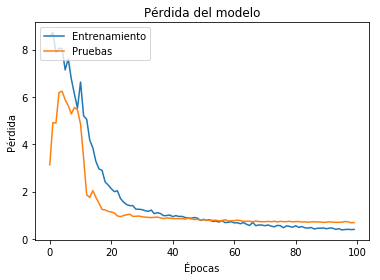

In [140]:
modelo_cnn = CNN(X, Y, X_test, Y_test, 400,400,1,100,0.00001)
model = modelo_cnn.train()


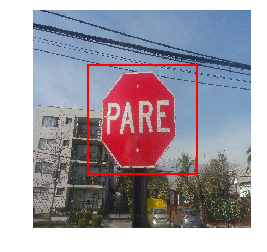

In [142]:
imagen = "D:/kaggle/disco pare/test/122.d.jpg"
#model = load_model('componente_cr_60pruebas.model') #Cargamos el modelo...
#model.predict(imagen)
bb = BB1(imagen, model, 400, 400, 1)
bb.main()